In [3]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from datasets import train_test_random_split, load_dsprites, CustomDSpritesDataset
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae, compute_mig
from beta_vae import Classifier
from factor_vae import Discriminator
from train import test_beta_vae, test_factor_vae, test_control_vae

In [4]:
seed = 2

In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cpu'

In [7]:
dataset = load_dsprites("../../datasets/dsprites.npz",False)

In [8]:
data_ = CustomDSpritesDataset(dataset,seed=seed)

In [9]:
data_train, data_test = train_test_random_split(data_,0.8, seed=seed)

In [10]:
batch_size=64
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False)

In [12]:
model_names = [f for f in os.listdir('../trained_models') if f[-4:] =='.dat' and not "alldata" in f  and not "nois" in f]
model_names

['betavae_beta4_e50_n.dat',
 'factorvae_epochs50_gamma5_lrvae0.01_lrd0.0001.dat',
 'factorvae_epochs50_gamma20_lrvae0.01_lrd8e-05.dat',
 'factorvae_epochs50_gamma40_lrvae0.01_lrd5e-05.dat',
 'betavae_beta1_e50_n.dat',
 'controlvae_epoch50_lr1e2_Cmax10.dat',
 'controlvae_epoch50_lr1e2_Cmax8.dat',
 'controlvae_epoch50_lr1e2_Cmax12.dat']

In [13]:
def plot_loss(loss_lists, title):
    if not isinstance(loss_lists[0], list):
        loss_lists = [loss_lists]
    for loss_list in loss_lists:
        plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training "+title+" of the classifier over epochs")
    plt.show()

In [14]:
types=["betavae","factorvae","factorvae","factorvae","betavae","controlvae","controlvae","controlvae"]
param_values=[4,5,20,40,1,10,8,12]
recon_losses = []
betavae_metric_accuracies=[]
factorvae_metric_accuracies=[]
mig_scores = []


model 1: betavae_beta4_e50_n.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 58.93835308651129
accuracies : [0.8240000000000001, 0.8160000000000001, 0.8240000000000001, 0.796, 0.804]
[[[  0.    0.    0.    2.8   0.    0. ]
  [  0.    0.    0.    0.4   0.    0. ]
  [  0.    0.2   0.    2.4   0.    0. ]
  [  0.   75.    0.   55.4   0.    0. ]
  [  0.    0.    0.    3.2   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.   26.2  93.6   0.6   0.    0. ]
  [  0.    3.8   0.    2.4   0.  103. ]
  [  0.    0.4   0.    1.4  95.6   0. ]
  [  0.    0.2   0.2  29.2   2.8   0. ]]]
0.8128
Factor Vae metric: 
Accuracy: 0.8128000000000002
Beta Vae metric: 
Accuracy: 0.7809999999999999


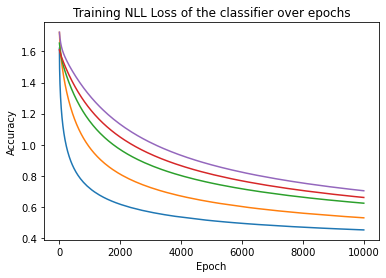

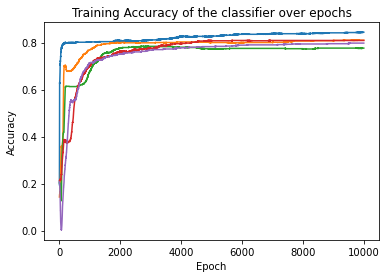

Mig metric
Scores: [0.21973787920259574, 0.22027037701141272, 0.21779058188632008, 0.21945447077108365, 0.21795099220269148]
Score: 0.21904086021482075
model 2: factorvae_epochs50_gamma5_lrvae0.01_lrd0.0001.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 47.24246512022283
accuracies : [0.748, 0.77, 0.73, 0.756, 0.77]
[[[ 0.  73.4  7.  42.6  0.   0. ]
  [ 0.   0.   2.2  3.8  0.   0. ]
  [ 0.   1.6  0.8 23.   0.   0. ]
  [ 0.  12.4  2.   2.8 97.4  7. ]
  [ 0.   0.   2.6  4.4  0.   0. ]
  [ 0.   0.   5.4  3.8  0.   0. ]
  [ 0.   0.   5.   5.6  0.   0. ]
  [ 0.   7.  64.4  6.6  0.   0. ]
  [ 0.  11.4  3.2  4.6  1.  96. ]
  [ 0.   0.   1.2  1.8  0.   0. ]]]
0.7548
Factor Vae metric: 
Accuracy: 0.7548000000000001
Beta Vae metric: 
Accuracy: 0.709


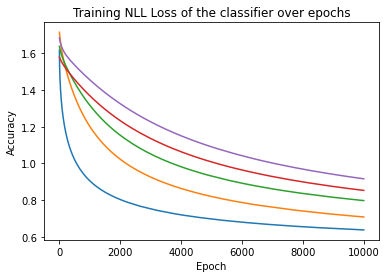

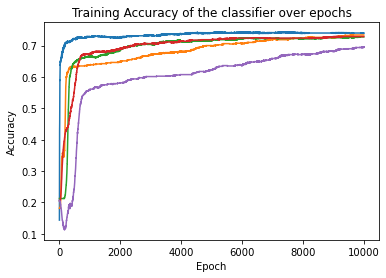

Mig metric
Scores: [0.15960771839392845, 0.15766504213072943, 0.15961566293193105, 0.15929466899883055, 0.15763183914808254]
Score: 0.1587629863207004
model 3: factorvae_epochs50_gamma20_lrvae0.01_lrd8e-05.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 54.807266402575706
accuracies : [0.6639999999999999, 0.6859999999999999, 0.6739999999999999, 0.642, 0.692]
[[[ 0.   0.6  0.   7.   0.   0. ]
  [ 0.   1.8  0.   2.6  0.   0. ]
  [ 0.   6.2 93.4  5.8  0.   0.2]
  [ 0.   7.6  0.  19.4 53.  19. ]
  [ 0.   0.   0.   2.   0.   0. ]
  [ 0.  11.6  0.4 24.2 36.  15. ]
  [ 0.   1.   0.   3.8  0.   0. ]
  [ 0.   7.4  0.  17.6  1.  36.2]
  [ 0.   0.2  0.   5.2  8.4 32.4]
  [ 0.  69.4  0.  11.4  0.   0.2]]]
0.6716
Factor Vae metric: 
Accuracy: 0.6716
Beta Vae metric: 
Accuracy: 0.627


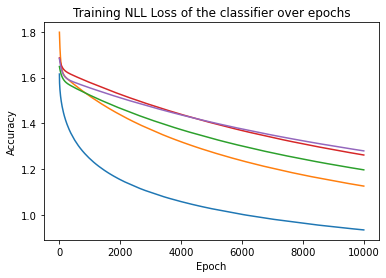

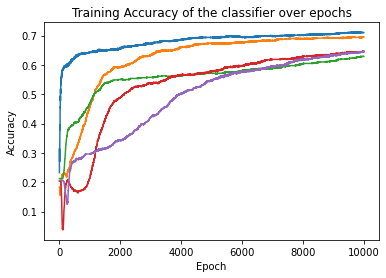

Mig metric
Scores: [0.07898380800412583, 0.07816616791452939, 0.079374696074058, 0.08036346693237809, 0.07953251859800524]
Score: 0.0792841315046193
model 4: factorvae_epochs50_gamma40_lrvae0.01_lrd5e-05.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 54.568300714095436
accuracies : [0.726, 0.69, 0.744, 0.714, 0.716]
[[[ 0.   1.6  0.2  4.2  0.   0. ]
  [ 0.   1.8  0.   1.4  0.   0. ]
  [ 0.   5.   0.  28.2  0.  26.6]
  [ 0.  26.6  4.2 23.   0.   0.6]
  [ 0.  11.4 83.8  1.   0.   0. ]
  [ 0.  17.4  1.8  4.2 96.2  0. ]
  [ 0.   0.4  0.   3.6  0.   0. ]
  [ 0.  34.6  0.  21.8  0.   0. ]
  [ 0.   6.2  3.8  9.2  2.2 75.8]
  [ 0.   0.8  0.   2.4  0.   0. ]]]
0.718
Factor Vae metric: 
Accuracy: 0.718
Beta Vae metric: 
Accuracy: 0.738


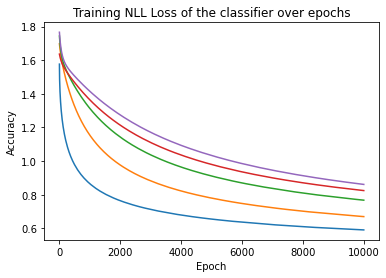

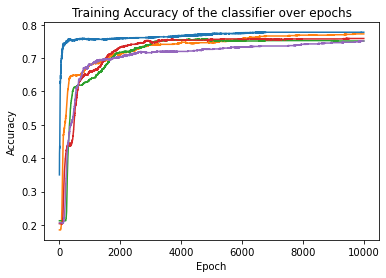

Mig metric
Scores: [0.11812966384533308, 0.11727645106559006, 0.11761852754529159, 0.1185626812036618, 0.11911266486649315]
Score: 0.11813999770527395
model 5: betavae_beta1_e50_n.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 32.401234443816875
accuracies : [0.612, 0.616, 0.648, 0.608, 0.618]
[[[ 0.   3.4  0.4 23.6 25.8  0. ]
  [ 0.   1.2  1.4  2.4  0.   0. ]
  [ 0.  36.2  4.4 17.   0.2  0. ]
  [ 0.   2.2  1.6  2.2  0.   0. ]
  [ 0.  25.6  4.4  8.8 24.6 98. ]
  [ 0.  12.8  1.2 11.6  3.6  0. ]
  [ 0.   6.6  2.6  8.2 29.4  4.8]
  [ 0.  13.  77.   6.   0.6  0.2]
  [ 0.   3.4  0.  12.  14.   0. ]
  [ 0.   1.4  0.8  7.2  0.2  0. ]]]
0.6204
Factor Vae metric: 
Accuracy: 0.6204
Beta Vae metric: 
Accuracy: 0.654


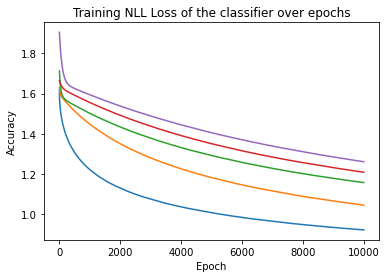

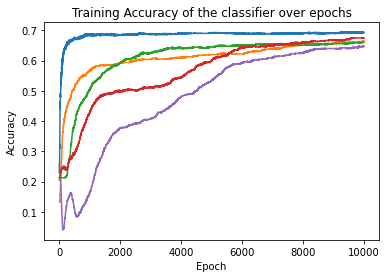

Mig metric
Scores: [0.05267989055567044, 0.052227047209714925, 0.052151255398871166, 0.05198014409856697, 0.05316517556085422]
Score: 0.05244070256473554
model 6: controlvae_epoch50_lr1e2_Cmax10.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 28.293531076775658
accuracies : [0.774, 0.76, 0.808, 0.786, 0.782]
[[[  0.    0.    0.    4.6   0.  103. ]
  [  0.   75.2   0.   74.2   0.    0. ]
  [  0.    0.    0.    2.8   0.    0. ]
  [  0.   30.6  93.8   2.2   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.    1.8  98.4   0. ]
  [  0.    0.    0.    0.6   0.    0. ]
  [  0.    0.    0.    5.    0.    0. ]
  [  0.    0.    0.    0.8   0.    0. ]
  [  0.    0.    0.    5.8   0.    0. ]]]
0.782
Factor Vae metric: 
Accuracy: 0.782
Beta Vae metric: 
Accuracy: 0.844


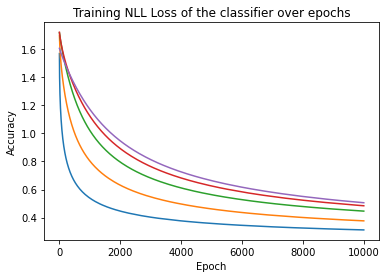

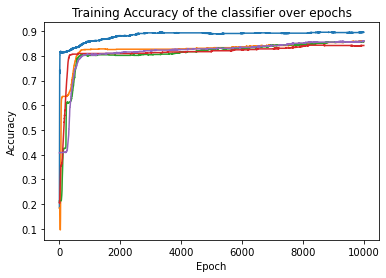

Mig metric
Scores: [0.29686891454192443, 0.2919845621384341, 0.29899929444543594, 0.29860239093641916, 0.2969754389213269]
Score: 0.2966861201967081
model 7: controlvae_epoch50_lr1e2_Cmax8.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 31.44749402006467
accuracies : [0.804, 0.784, 0.836, 0.794, 0.804]
[[[  0.    0.    0.    3.    0.  103. ]
  [  0.   75.2   1.8  56.6   0.    0. ]
  [  0.    0.    0.    2.4   0.    0. ]
  [  0.   30.6  92.    2.8   0.    0. ]
  [  0.    0.    0.    2.    0.    0. ]
  [  0.    0.    0.    3.   98.4   0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.   16.6   0.    0. ]
  [  0.    0.    0.    3.4   0.    0. ]
  [  0.    0.    0.    8.    0.    0. ]]]
0.8044
Factor Vae metric: 
Accuracy: 0.8044
Beta Vae metric: 
Accuracy: 0.834


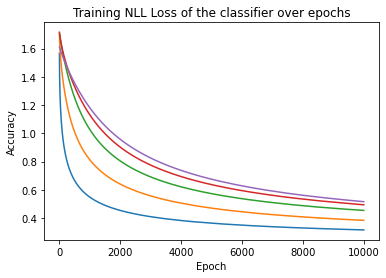

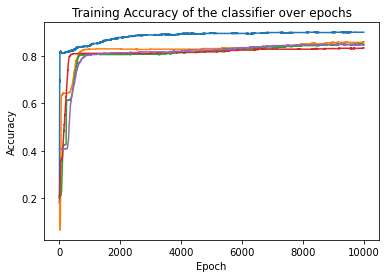

Mig metric
Scores: [0.26856115892311366, 0.2663490844025579, 0.26947434650336755, 0.27094505747996683, 0.26877161595075677]
Score: 0.26882025265195253
model 8: controlvae_epoch50_lr1e2_Cmax12.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 28.293799180951382
accuracies : [0.774, 0.76, 0.808, 0.786, 0.784]
[[[  0.    0.    0.    4.4   0.  103. ]
  [  0.   75.2   0.   74.2   0.    0. ]
  [  0.    0.    0.    3.2   0.    0. ]
  [  0.   30.6  93.8   2.2   0.    0. ]
  [  0.    0.    0.    1.4   0.    0. ]
  [  0.    0.    0.    1.8  98.4   0. ]
  [  0.    0.    0.    0.6   0.    0. ]
  [  0.    0.    0.    4.4   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.    5.6   0.    0. ]]]
0.7824
Factor Vae metric: 
Accuracy: 0.7824
Beta Vae metric: 
Accuracy: 0.843


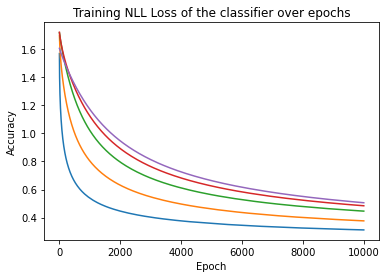

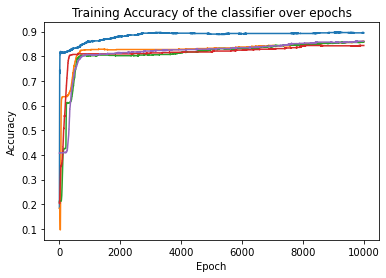

Mig metric
Scores: [0.29683899014492415, 0.29201545869148654, 0.2989462802062143, 0.2985501307842124, 0.2969085090770111]
Score: 0.2966518737807697


In [15]:
i=1

for name in model_names:
    model = torch.load('../trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    if name[0]=="b":
        recon_loss = test_beta_vae(model, test_loader,0, 'bernoulli', device=device)
    elif name[0]=="c":
        recon_loss = test_control_vae(model, test_loader, 'bernoulli', device=device)
    else:
        discriminator = Discriminator()
        recon_loss = test_factor_vae(model,discriminator, test_loader,0, 'bernoulli', device=device)
    recon_losses.append(recon_loss)
    print("Reconstruction loss: "+str(recon_loss))
    accuracies = entanglement_metric_factor_vae(model, data_, 500, 200, random_seeds=5, device = device,seed=seed)
    factorvae_metric_accuracies.append(accuracies)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(np.mean(accuracies)))
    print("Beta Vae metric: ")
    torch.manual_seed(seed)
    classifier = Classifier()
    classifier.to(device)
    optimizer = torch.optim.Adagrad(classifier.parameters(), lr=1e-2)
    train_losses, train_accuracies, test_accuracies = entanglement_metric_beta_vae(model, classifier, optimizer, 10000,  data_, 1000, 50, random_seeds=5, device = device,seed=seed)
    betavae_metric_accuracies.append(test_accuracies)
    print("Accuracy: "+str(np.mean(test_accuracies)))
    plot_loss(train_losses, "NLL Loss")
    plot_loss(train_accuracies, "Accuracy")
    print("Mig metric")
    scores = compute_mig(model, data_, num_samples=100000, random_seeds=5, device=device, seed=seed)
    mig_scores.append(scores)
    print("Scores: "+str(scores))
    print("Score: "+str(np.mean(scores)))
    i+=1

In [16]:
recon_losses

[58.93835308651129,
 47.24246512022283,
 54.807266402575706,
 54.568300714095436,
 32.401234443816875,
 28.293531076775658,
 31.44749402006467,
 28.293799180951382]

In [17]:
betavae_metric_accuracies

[[0.845, 0.75, 0.79, 0.76, 0.76],
 [0.78, 0.635, 0.72, 0.7, 0.71],
 [0.74, 0.635, 0.57, 0.57, 0.62],
 [0.805, 0.69, 0.745, 0.715, 0.735],
 [0.705, 0.61, 0.635, 0.68, 0.64],
 [0.915, 0.81, 0.86, 0.815, 0.82],
 [0.905, 0.79, 0.835, 0.82, 0.82],
 [0.915, 0.81, 0.855, 0.815, 0.82]]

In [18]:
factorvae_metric_accuracies

[[0.8240000000000001, 0.8160000000000001, 0.8240000000000001, 0.796, 0.804],
 [0.748, 0.77, 0.73, 0.756, 0.77],
 [0.6639999999999999, 0.6859999999999999, 0.6739999999999999, 0.642, 0.692],
 [0.726, 0.69, 0.744, 0.714, 0.716],
 [0.612, 0.616, 0.648, 0.608, 0.618],
 [0.774, 0.76, 0.808, 0.786, 0.782],
 [0.804, 0.784, 0.836, 0.794, 0.804],
 [0.774, 0.76, 0.808, 0.786, 0.784]]

In [19]:
mig_scores

[[0.21973787920259574,
  0.22027037701141272,
  0.21779058188632008,
  0.21945447077108365,
  0.21795099220269148],
 [0.15960771839392845,
  0.15766504213072943,
  0.15961566293193105,
  0.15929466899883055,
  0.15763183914808254],
 [0.07898380800412583,
  0.07816616791452939,
  0.079374696074058,
  0.08036346693237809,
  0.07953251859800524],
 [0.11812966384533308,
  0.11727645106559006,
  0.11761852754529159,
  0.1185626812036618,
  0.11911266486649315],
 [0.05267989055567044,
  0.052227047209714925,
  0.052151255398871166,
  0.05198014409856697,
  0.05316517556085422],
 [0.29686891454192443,
  0.2919845621384341,
  0.29899929444543594,
  0.29860239093641916,
  0.2969754389213269],
 [0.26856115892311366,
  0.2663490844025579,
  0.26947434650336755,
  0.27094505747996683,
  0.26877161595075677],
 [0.29683899014492415,
  0.29201545869148654,
  0.2989462802062143,
  0.2985501307842124,
  0.2969085090770111]]

In [20]:
def plot_recon_accuracy(recons, accuracies, types, values, metric_name):
    color_per_type = {"betavae":[255,100,0], "factorvae":[100,200,255],"controlvae":[0,0,255]}
    param_name_per_type = {"betavae": r'$\beta$', "factorvae":r'$\gamma$',"controlvae":r'$C_{max}$'}
    for i in range(len(accuracies)):
        error = np.std(accuracies[i])
        mean_accuracy=np.mean(accuracies[i])
        color=np.array(color_per_type[types[i]])
        plt.errorbar(recons[i],mean_accuracy, yerr=error, fmt='o', c=color/255.0)
        param_name = param_name_per_type[types[i]]
        plt.annotate(param_name+"="+str(values[i]), (recons[i], mean_accuracy),ha='center',va='top')
    plt.xlabel("Reconstruction loss")
    plt.ylabel("Accuracy")
    plt.title(metric_name+" accuracy against reconstruction loss per model")
    blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='ControlVAE')
    red_line = mlines.Line2D([], [], color='darkorange', marker='.',
                          markersize=15, label='BetaVAE')
    green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='FactorVAE')
    plt.legend(handles=[blue_line,red_line,green_line])
    plt.show()

In [21]:
plt.rcParams["figure.figsize"] = (6,4)

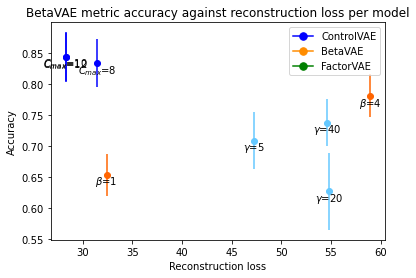

In [22]:
plot_recon_accuracy(recon_losses, betavae_metric_accuracies, types, param_values, "BetaVAE metric")

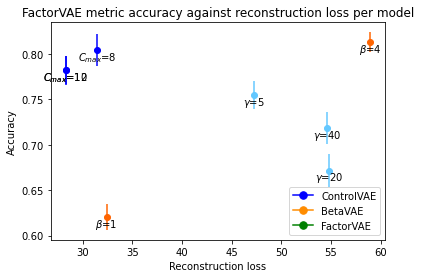

In [23]:
plot_recon_accuracy(recon_losses, factorvae_metric_accuracies, types, param_values, "FactorVAE metric")

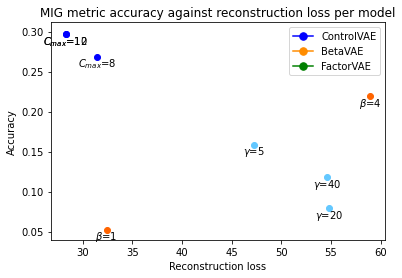

In [24]:
plot_recon_accuracy(recon_losses, mig_scores, types, param_values, "MIG metric")